In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
ff = pd.read_csv('forestfires.csv')
ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
ff = ff.iloc[:,2:] #Dropping 1st 2 columns

In [5]:
ff.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


C:\Users\Anup0\AppData\Local\Temp\ipykernel_16188\2945241454.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ff.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')


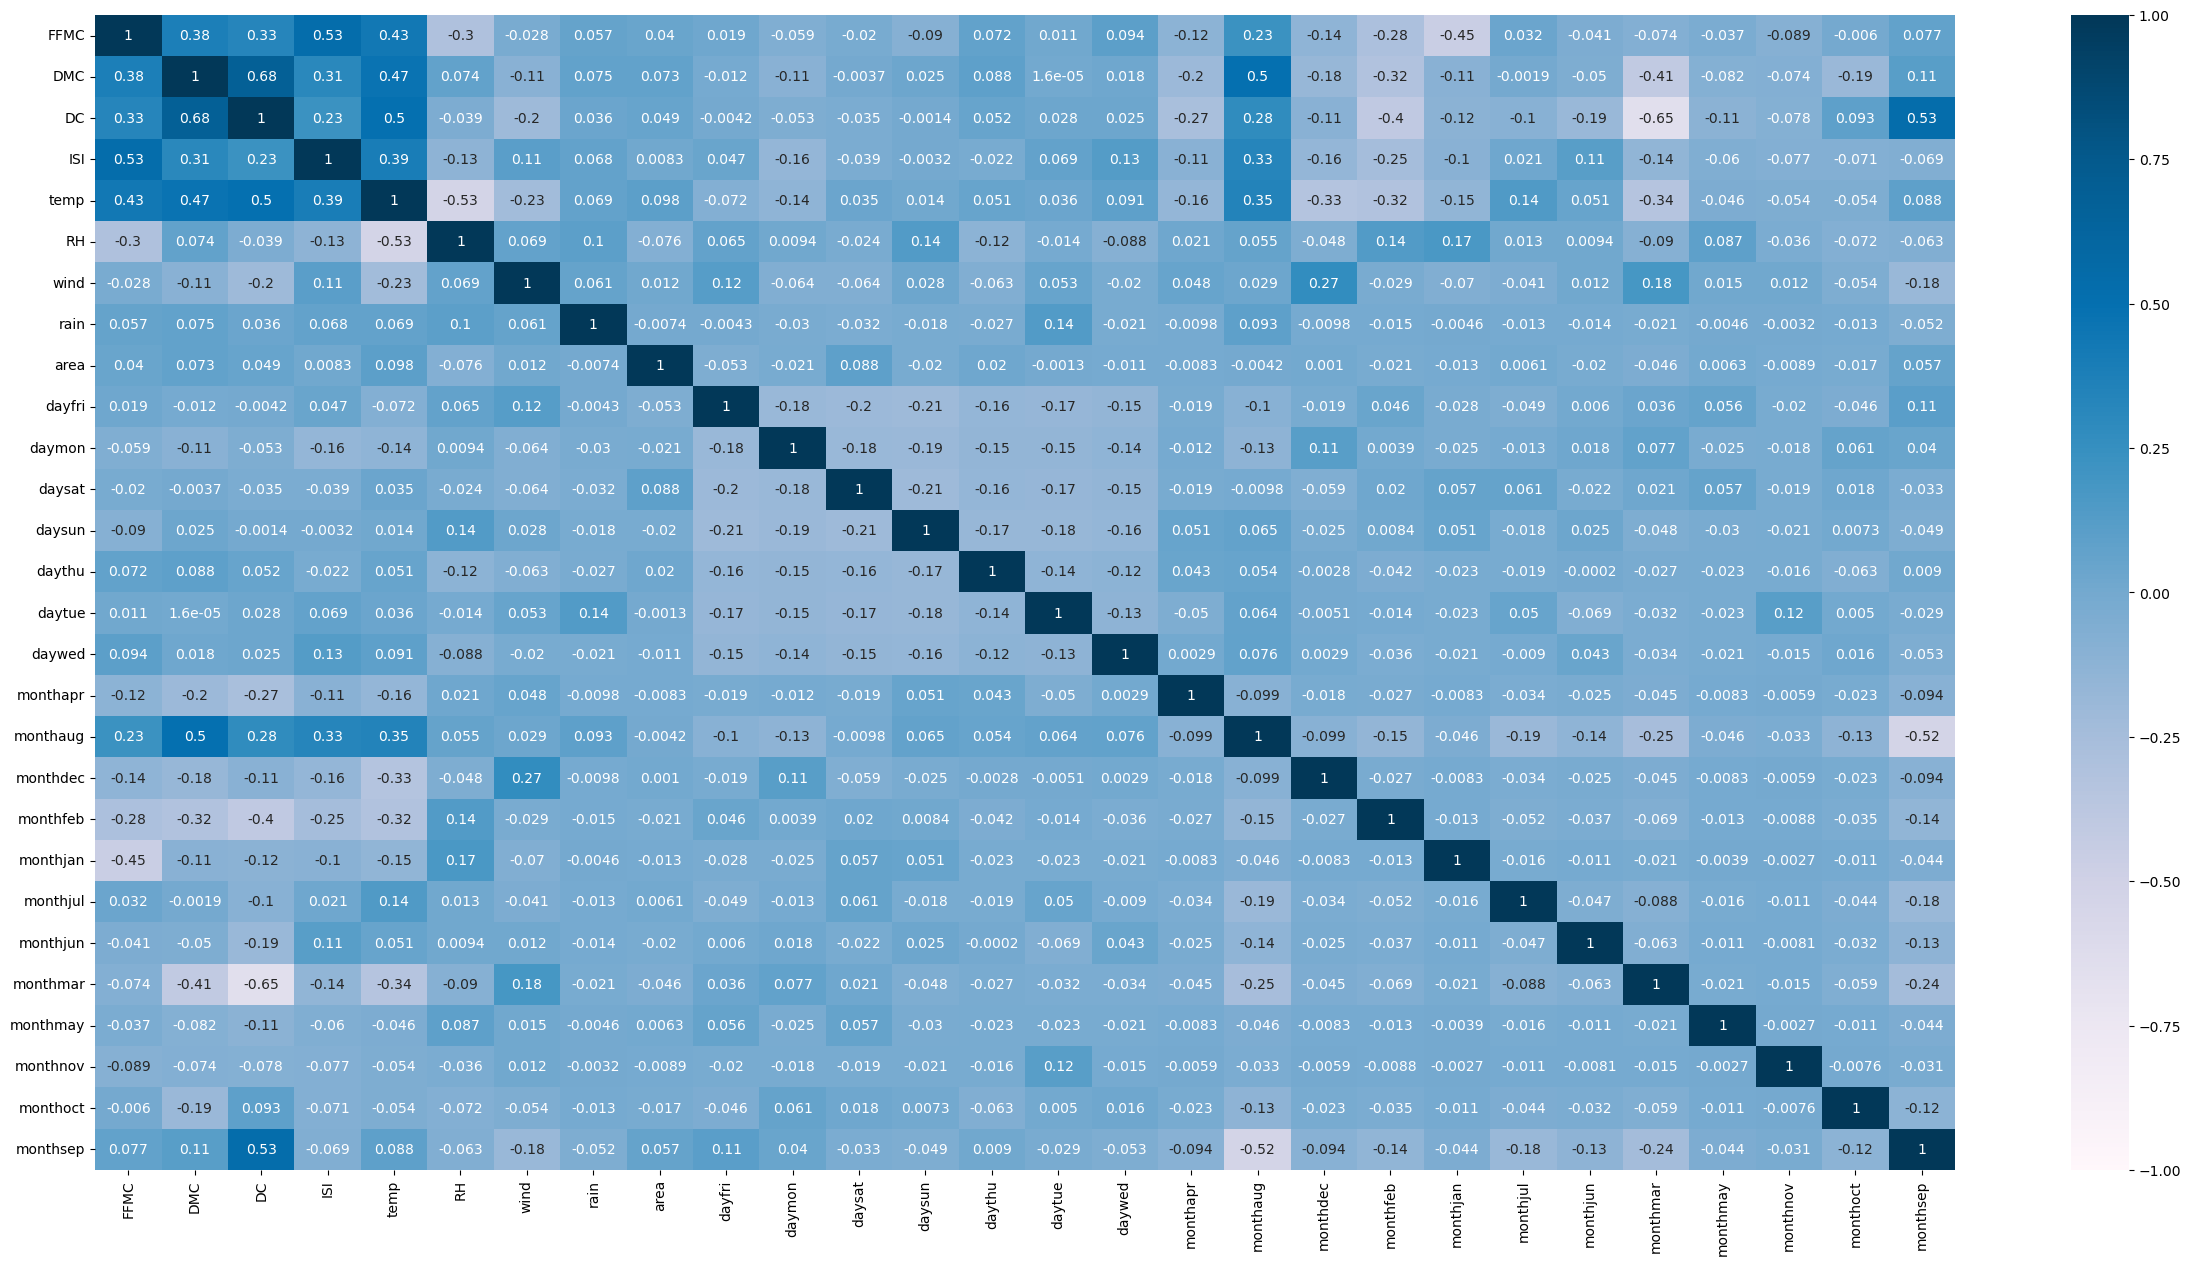

In [6]:
plt.figure(figsize=(30,15))
sns.heatmap(ff.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')
plt.show()

In [7]:
ff.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

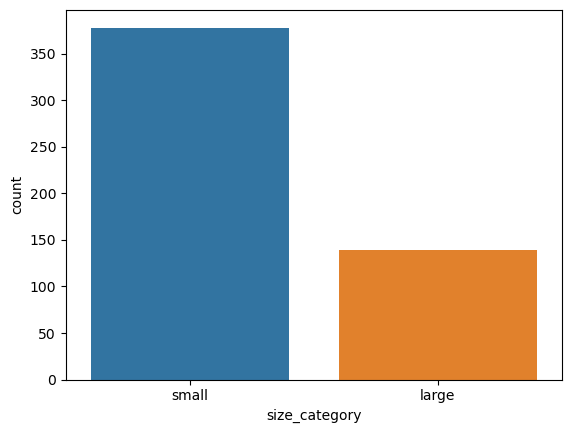

In [8]:
# Checking for class imbalance:
sns.countplot(x = 'size_category',data = ff)
plt.show()

Box Plot of :  FFMC


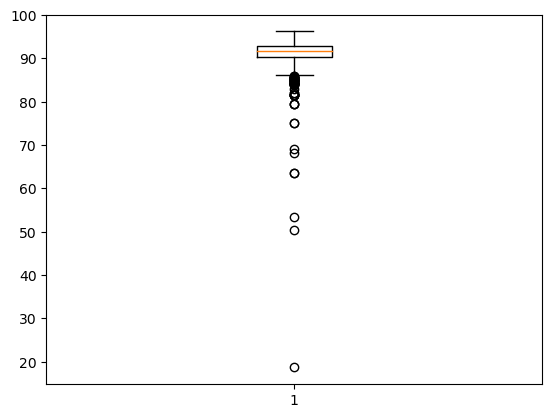

Box Plot of :  DMC


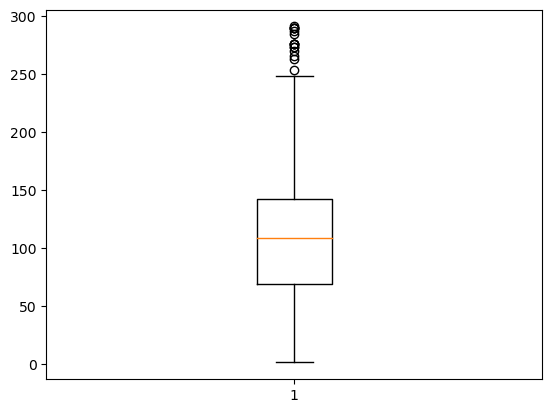

Box Plot of :  DC


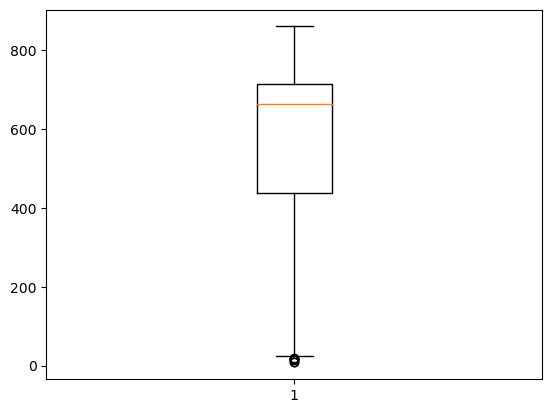

Box Plot of :  ISI


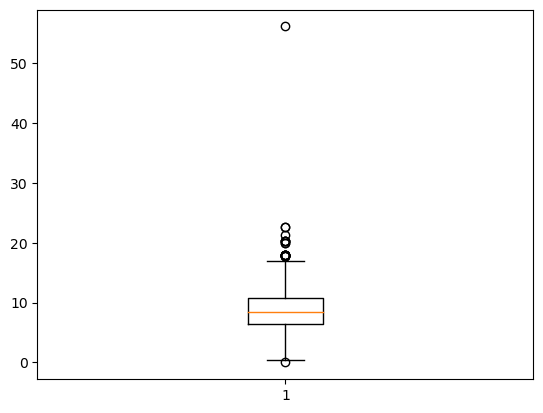

Box Plot of :  temp


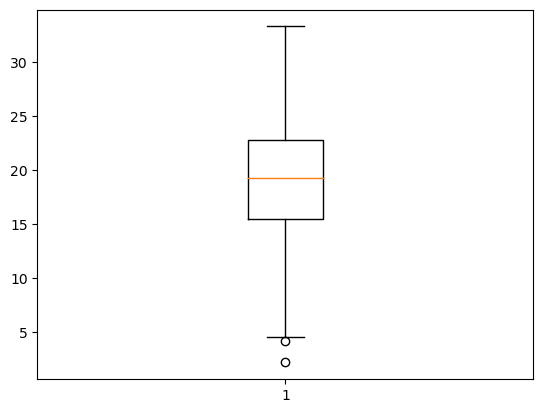

Box Plot of :  RH


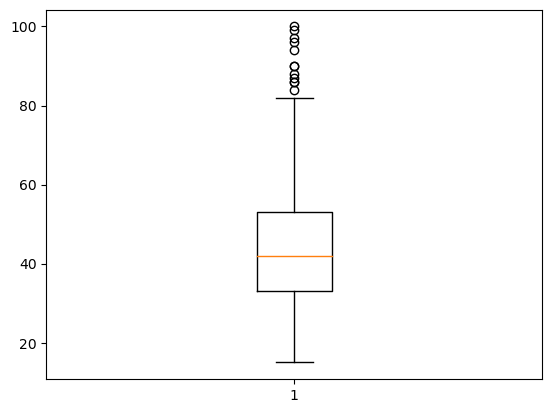

Box Plot of :  wind


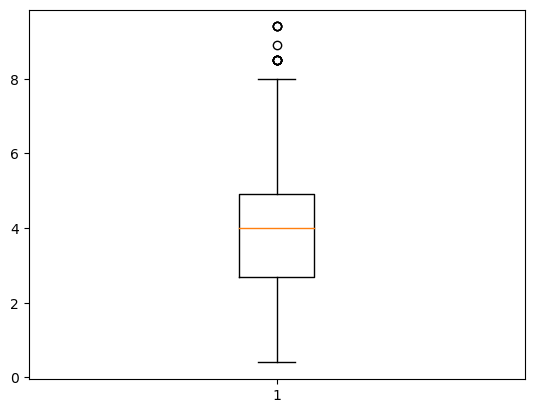

Box Plot of :  rain


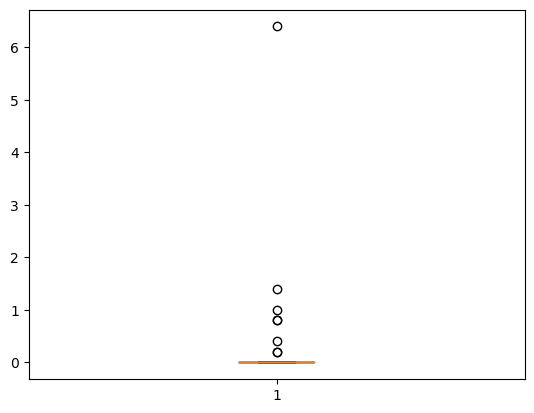

Box Plot of :  area


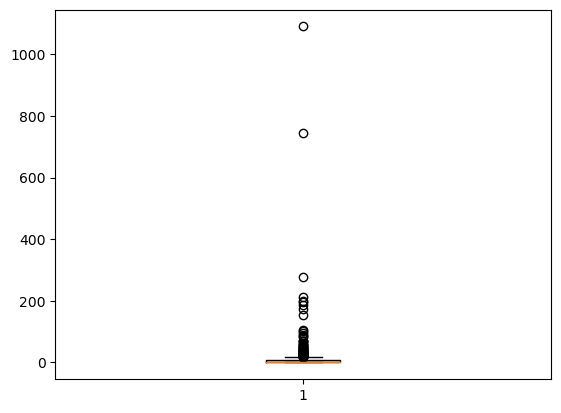

In [9]:
for i in ff.iloc[:,:-20].columns:
    print('Box Plot of : ',i)
    plt.boxplot(ff[i])
    plt.show()

Histogram of :  FFMC


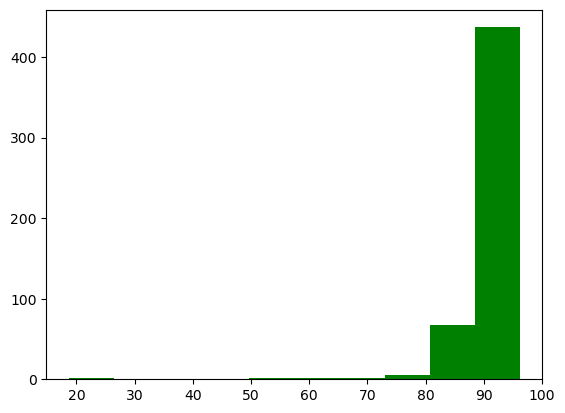

Histogram of :  DMC


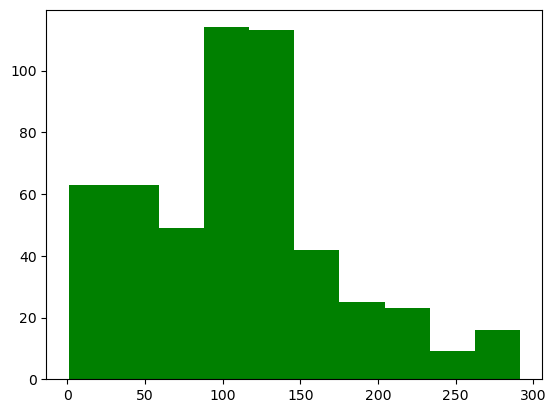

Histogram of :  DC


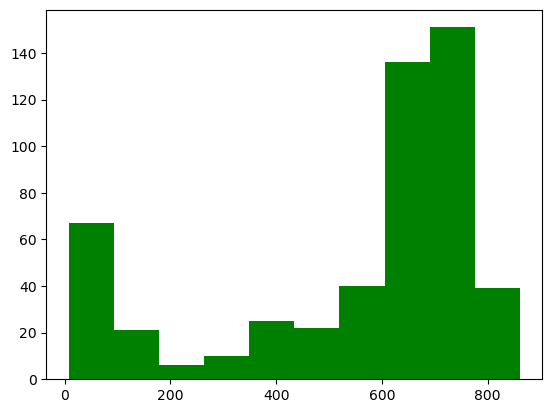

Histogram of :  ISI


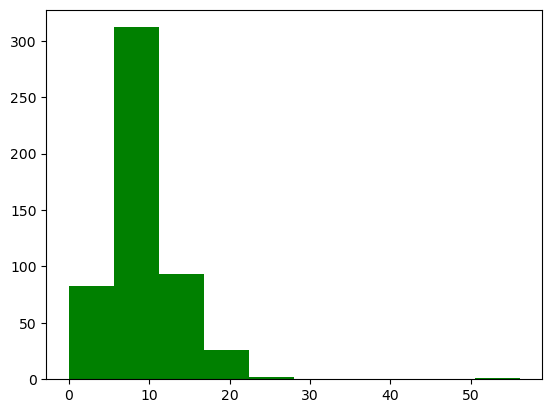

Histogram of :  temp


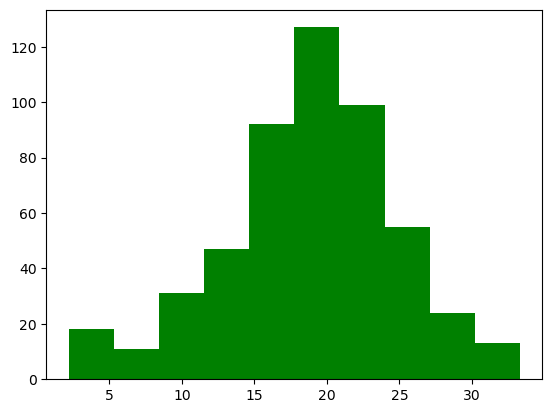

Histogram of :  RH


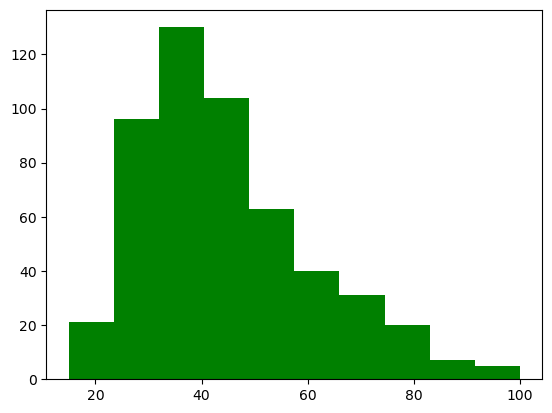

Histogram of :  wind


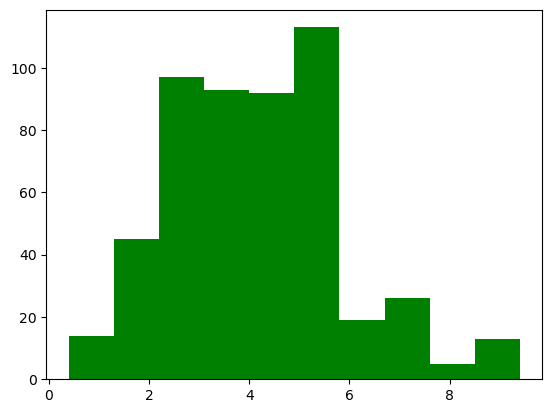

Histogram of :  rain


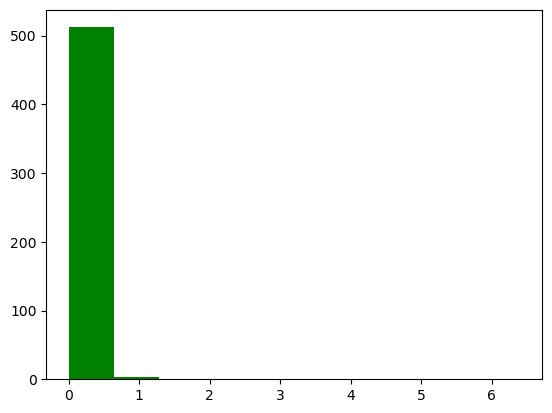

Histogram of :  area


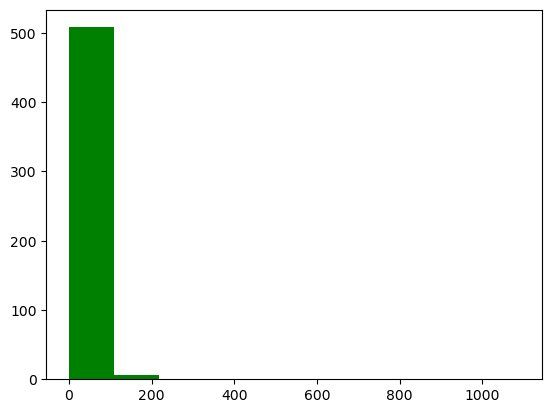

In [10]:
for i in ff.iloc[:,:-20].columns:
    print('Histogram of : ',i)
    plt.hist(ff[i],color='Green')
    plt.show()

In [11]:
ff.duplicated().sum()

8

In [12]:
ff[ff.duplicated()]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
100,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
215,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,...,0,0,0,0,1,0,0,0,0,large
303,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,...,0,0,0,1,0,0,0,0,0,small
426,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
461,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
501,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,...,0,0,0,0,0,0,0,0,0,small
508,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,small


In [13]:
ff.drop_duplicates(inplace=True)
ff.reset_index(inplace=True,drop=True)

In [14]:
ff.duplicated().sum()

0

<Figure size 3000x3000 with 0 Axes>

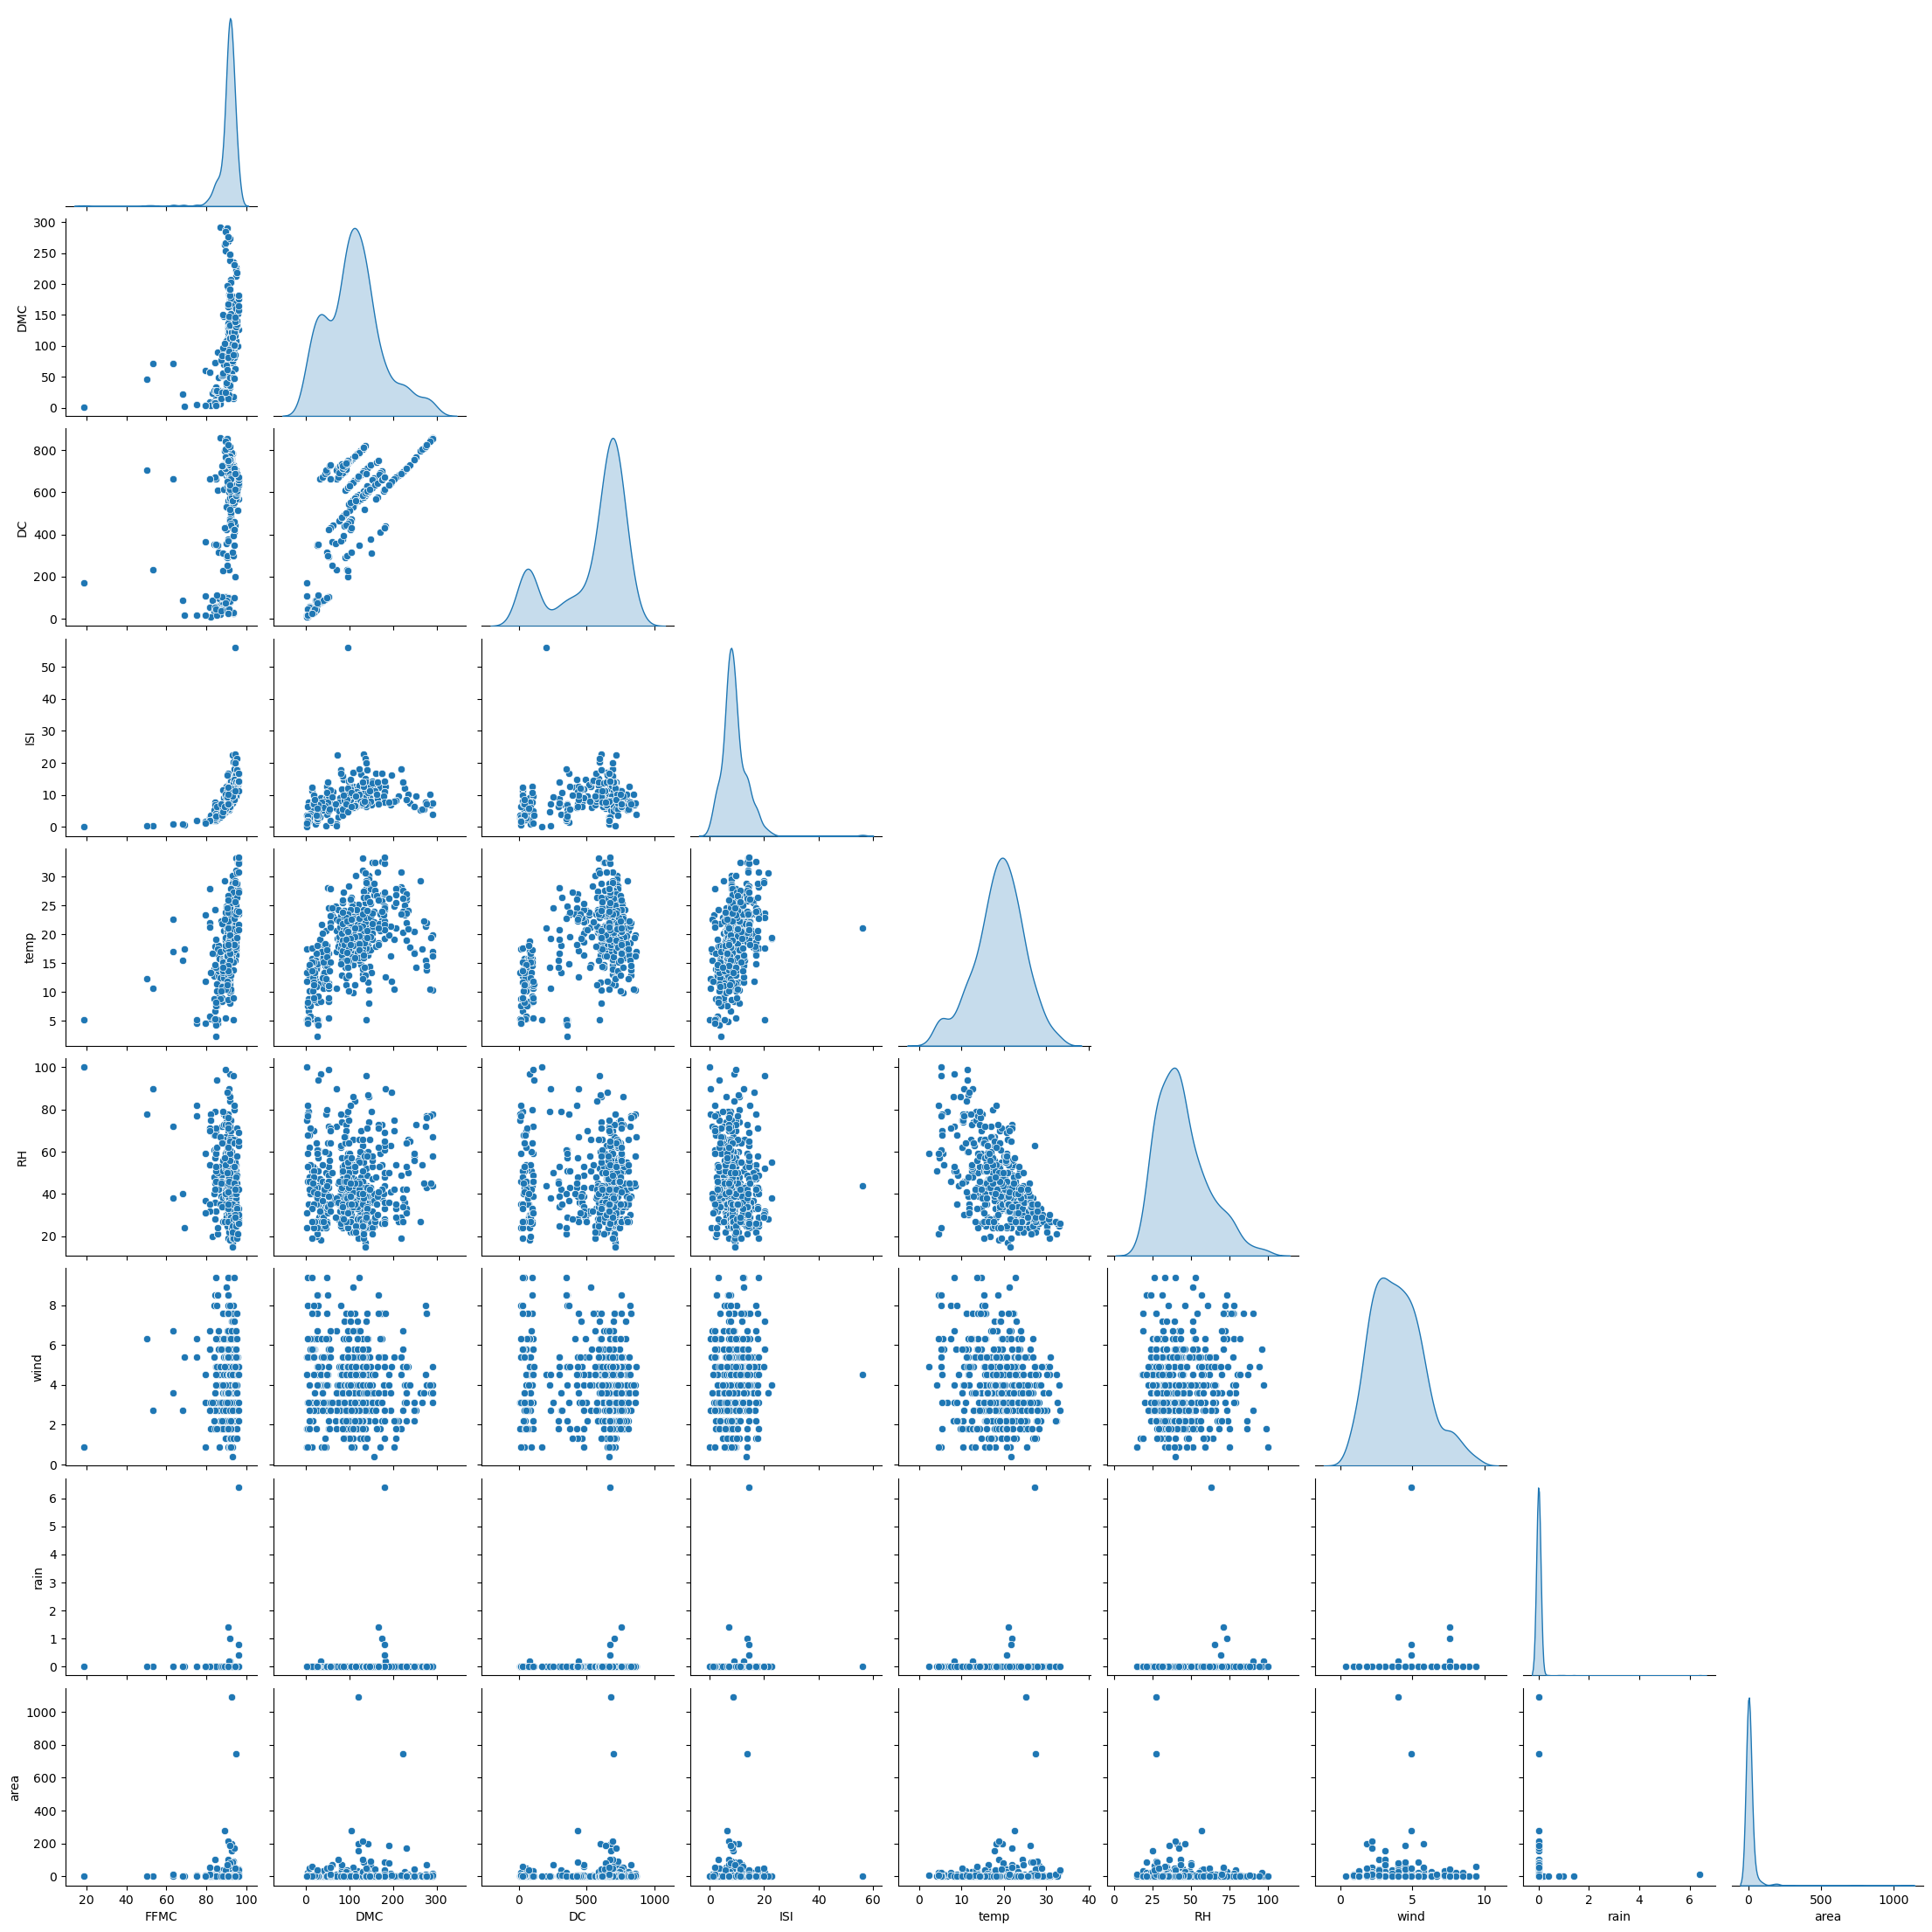

In [15]:
# Plotting pairlot to check all the features at once:
plt.figure(figsize=(30,30))
sns.pairplot(ff.iloc[:,:-20],corner=True,diag_kind='kde')
plt.show()

In [16]:
# Splitting data into features and target:
X = ff.iloc[:,:-1]
y = ff.iloc[:,-1]

In [17]:
# Scaling the data as we are going to perform distance based calculations:
XScaled = X.apply(zscore)
XScaled.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,2.265509,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,2.265509,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,-0.441402,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413


In [18]:
# Splitting the data into train and test:
X_train,X_test,y_train,y_test=train_test_split(XScaled,y,test_size=0.25,random_state=42)

#### Building SVM model:

In [19]:
svm_clf = SVC(kernel='sigmoid')
svm_model = svm_clf.fit(X_train,y_train)
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

print("Accuracy Score for Train : ",accuracy_score(y_train_pred,y_train))
print("Accuracy Score for Test : ",accuracy_score(y_test_pred,y_test),'\n')

print("Confusion_matrix for Train : ",'\n',confusion_matrix(y_train_pred,y_train),'\n')
print("Classification_report for Train : ",'\n',classification_report(y_train_pred,y_train),'\n')


print("Confusion_matrix for Test : ",'\n',confusion_matrix(y_test_pred,y_test),'\n')
print("Classification_report for Test : ",'\n',classification_report(y_test_pred,y_test),'\n')

Accuracy Score for Train :  0.7690288713910761
Accuracy Score for Test :  0.78125 

Confusion_matrix for Train :  
 [[ 15   4]
 [ 84 278]] 

Classification_report for Train :  
               precision    recall  f1-score   support

       large       0.15      0.79      0.25        19
       small       0.99      0.77      0.86       362

    accuracy                           0.77       381
   macro avg       0.57      0.78      0.56       381
weighted avg       0.94      0.77      0.83       381
 

Confusion_matrix for Test :  
 [[12  1]
 [27 88]] 

Classification_report for Test :  
               precision    recall  f1-score   support

       large       0.31      0.92      0.46        13
       small       0.99      0.77      0.86       115

    accuracy                           0.78       128
   macro avg       0.65      0.84      0.66       128
weighted avg       0.92      0.78      0.82       128
 



In [20]:
svm_clf = SVC(kernel='linear')
svm_model = svm_clf.fit(X_train,y_train)
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

print("Accuracy Score for Train : ",accuracy_score(y_train_pred,y_train))
print("Accuracy Score for Test : ",accuracy_score(y_test_pred,y_test),'\n')

print("Confusion_matrix for Train : ",'\n',confusion_matrix(y_train_pred,y_train),'\n')
print("Classification_report for Train : ",'\n',classification_report(y_train_pred,y_train),'\n')


print("Confusion_matrix for Test : ",'\n',confusion_matrix(y_test_pred,y_test),'\n')
print("Classification_report for Test : ",'\n',classification_report(y_test_pred,y_test),'\n')

Accuracy Score for Train :  0.916010498687664
Accuracy Score for Test :  0.8515625 

Confusion_matrix for Train :  
 [[ 67   0]
 [ 32 282]] 

Classification_report for Train :  
               precision    recall  f1-score   support

       large       0.68      1.00      0.81        67
       small       1.00      0.90      0.95       314

    accuracy                           0.92       381
   macro avg       0.84      0.95      0.88       381
weighted avg       0.94      0.92      0.92       381
 

Confusion_matrix for Test :  
 [[21  1]
 [18 88]] 

Classification_report for Test :  
               precision    recall  f1-score   support

       large       0.54      0.95      0.69        22
       small       0.99      0.83      0.90       106

    accuracy                           0.85       128
   macro avg       0.76      0.89      0.80       128
weighted avg       0.91      0.85      0.87       128
 



In [21]:
svm_clf = SVC(kernel='rbf')
svm_model = svm_clf.fit(X_train,y_train)
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

print("Accuracy Score for Train : ",accuracy_score(y_train_pred,y_train))
print("Accuracy Score for Test : ",accuracy_score(y_test_pred,y_test),'\n')

print("Confusion_matrix for Train : ",'\n',confusion_matrix(y_train_pred,y_train),'\n')
print("Classification_report for Train : ",'\n',classification_report(y_train_pred,y_train),'\n')


print("Confusion_matrix for Test : ",'\n',confusion_matrix(y_test_pred,y_test),'\n')
print("Classification_report for Test : ",'\n',classification_report(y_test_pred,y_test),'\n')

Accuracy Score for Train :  0.7716535433070866
Accuracy Score for Test :  0.765625 

Confusion_matrix for Train :  
 [[ 12   0]
 [ 87 282]] 

Classification_report for Train :  
               precision    recall  f1-score   support

       large       0.12      1.00      0.22        12
       small       1.00      0.76      0.87       369

    accuracy                           0.77       381
   macro avg       0.56      0.88      0.54       381
weighted avg       0.97      0.77      0.85       381
 

Confusion_matrix for Test :  
 [[10  1]
 [29 88]] 

Classification_report for Test :  
               precision    recall  f1-score   support

       large       0.26      0.91      0.40        11
       small       0.99      0.75      0.85       117

    accuracy                           0.77       128
   macro avg       0.62      0.83      0.63       128
weighted avg       0.93      0.77      0.82       128
 



In [22]:
#Observation: We are getting a good fit model with kernel='rbf'

In [36]:
# Let's experiment with kernel='linear' to see if we can get better accuracy:
for i in np.arange(0.01,1,0.01):
    svm_clf = SVC(kernel='linear',C=i)
    svm_model = svm_clf.fit(X_train,y_train)
    y_train_pred = svm_clf.predict(X_train)
    y_test_pred = svm_clf.predict(X_test)

    print("Accuracy Score for Train for C : ",i,'  is :  ',accuracy_score(y_train_pred,y_train))
    print("Accuracy Score for Test for C : ",i,'  is :  ',accuracy_score(y_test_pred,y_test))
    print("Variance is : ",accuracy_score(y_train_pred,y_train)-accuracy_score(y_test_pred,y_test),'\n')


Accuracy Score for Train for C :  0.01   is :   0.7637795275590551
Accuracy Score for Test for C :  0.01   is :   0.75
Variance is :  0.013779527559055094 

Accuracy Score for Train for C :  0.02   is :   0.7664041994750657
Accuracy Score for Test for C :  0.02   is :   0.765625
Variance is :  0.0007791994750656617 

Accuracy Score for Train for C :  0.03   is :   0.7769028871391076
Accuracy Score for Test for C :  0.03   is :   0.7890625
Variance is :  -0.0121596128608924 

Accuracy Score for Train for C :  0.04   is :   0.7874015748031497
Accuracy Score for Test for C :  0.04   is :   0.7890625
Variance is :  -0.0016609251968503491 

Accuracy Score for Train for C :  0.05   is :   0.8031496062992126
Accuracy Score for Test for C :  0.05   is :   0.7890625
Variance is :  0.014087106299212615 

Accuracy Score for Train for C :  0.060000000000000005   is :   0.8110236220472441
Accuracy Score for Test for C :  0.060000000000000005   is :   0.796875
Variance is :  0.014148622047244097 

A

Accuracy Score for Train for C :  0.6   is :   0.89501312335958
Accuracy Score for Test for C :  0.6   is :   0.8359375
Variance is :  0.059075623359580054 

Accuracy Score for Train for C :  0.61   is :   0.89501312335958
Accuracy Score for Test for C :  0.61   is :   0.8359375
Variance is :  0.059075623359580054 

Accuracy Score for Train for C :  0.62   is :   0.89501312335958
Accuracy Score for Test for C :  0.62   is :   0.8359375
Variance is :  0.059075623359580054 

Accuracy Score for Train for C :  0.63   is :   0.89501312335958
Accuracy Score for Test for C :  0.63   is :   0.8359375
Variance is :  0.059075623359580054 

Accuracy Score for Train for C :  0.64   is :   0.89501312335958
Accuracy Score for Test for C :  0.64   is :   0.8359375
Variance is :  0.059075623359580054 

Accuracy Score for Train for C :  0.65   is :   0.89501312335958
Accuracy Score for Test for C :  0.65   is :   0.8359375
Variance is :  0.059075623359580054 

Accuracy Score for Train for C :  0.66   i

In [44]:
# Let's experiment with kernel='linear' to see if we can get better accuracy:
svm_clf = SVC(kernel='linear',C=0.15)
svm_model = svm_clf.fit(X_train,y_train)
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

print("Accuracy Score for Train : ",np.round(accuracy_score(y_train_pred,y_train),2))
print("Accuracy Score for Test : ",np.round(accuracy_score(y_test_pred,y_test),2),'\n')

print("Confusion_matrix for Train : ",'\n',confusion_matrix(y_train_pred,y_train),'\n')
print("Classification_report for Train : ",'\n',classification_report(y_train_pred,y_train),'\n')


print("Confusion_matrix for Test : ",'\n',confusion_matrix(y_test_pred,y_test),'\n')
print("Classification_report for Test : ",'\n',classification_report(y_test_pred,y_test),'\n')

Accuracy Score for Train :  0.85
Accuracy Score for Test :  0.83 

Confusion_matrix for Train :  
 [[ 43   0]
 [ 56 282]] 

Classification_report for Train :  
               precision    recall  f1-score   support

       large       0.43      1.00      0.61        43
       small       1.00      0.83      0.91       338

    accuracy                           0.85       381
   macro avg       0.72      0.92      0.76       381
weighted avg       0.94      0.85      0.88       381
 

Confusion_matrix for Test :  
 [[18  1]
 [21 88]] 

Classification_report for Test :  
               precision    recall  f1-score   support

       large       0.46      0.95      0.62        19
       small       0.99      0.81      0.89       109

    accuracy                           0.83       128
   macro avg       0.73      0.88      0.75       128
weighted avg       0.91      0.83      0.85       128
 

